In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import shutil

In [2]:
# function for numerical scheme in custom package 
from euler_scheme_1d_with_growth.analytical_solutions import steady_solution, nrect
from euler_scheme_1d_with_growth.functions_for_numerics import *

In [3]:
# GROWTH RULE
import euler_scheme_1d_with_growth.two_morph as two_morph
from euler_scheme_1d_with_growth.growth_rules import two_morph_growth_rule as growth_rule

# Parameters

## Diffusion

In [4]:
# assume to be 1
D     = 1
beta  = 1
alpha = 1
lam   = math.sqrt(D/beta) 

# supported by experiments
x0    = 0.5*lam 
w     = 0.5*lam

# minimal anitial size: minimal possible x0 + w, minimal plausible 2 * (x0 + w/2), minimal prefered (2 * x0 + 2 * w)
L0    = 1.8 * (x0 + w)

thresholds_to_test = np.linspace(0.15, 0.285, 5)

# for plotting
Lfinals = np.linspace(0, 4 , 100)

## Parameters for simulations

In [5]:
small_number = 1e-6

# space x
ndx  = 500
dx   = L0/ndx

# time t
tmax         = 10
dt           = 0.5*1e-5
t            = np.arange(0, tmax+small_number, dt)
ndt          = len(t)

# save only ndt_to_save time points
ndt_to_save = 1000

In [6]:
D * dt / dx**2

0.3858024691358025

## Growth rate g

In [7]:
g_to_test = np.array([0.5, 1, 5]) * beta
g_to_test

array([0.5, 1. , 5. ])

# Lfinal(threshold)

In [8]:
thresholds = np.array( [
    two_morph.threshold_vs_Lfinal(Lfinal, x0, lam, alpha, w, beta, D) 
    for Lfinal in Lfinals] )

In [9]:
print( thresholds_to_test )
Lfinals_to_reach   = np.array([
    two_morph.Lfinal(threshold, x0, lam, alpha, w, beta, D) for threshold in thresholds_to_test
])

[0.15    0.18375 0.2175  0.25125 0.285  ]


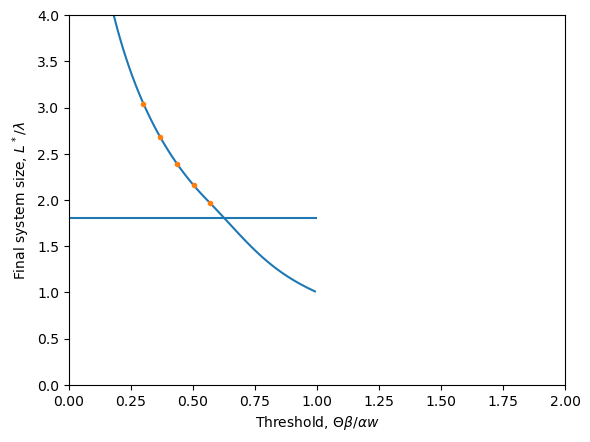

In [10]:
plt.plot( thresholds*beta/alpha/w, Lfinals/lam )
plt.plot( thresholds_to_test*beta/alpha/w, Lfinals_to_reach/lam, '.' )
plt.hlines(L0, 0, 1)
plt.xlabel(r'Threshold, $\Theta \beta / \alpha w$')
plt.ylabel(r'Final system size, $L^*/\lambda$')
plt.xlim( 0, 2 )
plt.ylim( 0, 4 )
plt.show()

# Simulation

In [11]:
from euler_scheme_1d_with_growth.two_morph import *

In [12]:
output_folder = 'results_of_numerics/two_morph/dynamics/'

if os.path.exists(output_folder):
    # Delete the existing folder
    shutil.rmtree(output_folder)

# Create empty the folder
os.makedirs(output_folder)

In [13]:
# write simulation parameters to text file
# Save parameters to a text file
file_path = os.path.join( output_folder, "parameters.txt")

with open(file_path, 'w') as file:
    file.write("Model Parameters:\n")
    file.write(f"D: {D}\n")
    file.write(f"beta: {beta}\n")
    file.write(f"alpha: {alpha}\n")
    file.write(f"lambda (sqrt(D/beta)): {lam}\n")
    file.write(f"x0: {x0}\n")
    file.write(f"w: {w}\n")
    file.write(f"L0: {L0}\n")
    file.write(f"small_number: {small_number}\n\n")
    
    file.write("Space Parameters:\n")
    file.write(f"ndx: {ndx}\n")
    file.write(f"dx: {dx}\n\n")
    
    file.write("Time Parameters:\n")
    file.write(f"tmax: {tmax}\n")
    file.write(f"dt: {dt}\n")
    file.write(f"t (array length): {len(t)}\n")
    file.write(f"ndt: {ndt}\n")
    file.write(f"ndt_to_save: {ndt_to_save}\n")

In [14]:
for g in g_to_test:
    for threshold_growth in thresholds_to_test:
        print(f'th_{threshold_growth}_g_{g}')
        simulation = two_morph_euler(D, beta, alpha, L0, x0, w, g, threshold_growth, ndx, dx, tmax, dt, t, ndt, ndt_to_save)
        simulation.run_simulation()
        simulation.save_results(folder_base=output_folder)

th_0.15_g_0.5


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [19:35<00:00, 1701.74it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.15_g_0.5
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.15_g_0.5
th_0.18375_g_0.5


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [19:19<00:00, 1725.29it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.18375_g_0.5
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.18375_g_0.5
th_0.21749999999999997_g_0.5


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [19:10<00:00, 1738.85it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.21749999999999997_g_0.5
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.21749999999999997_g_0.5
th_0.25125_g_0.5


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [19:33<00:00, 1703.64it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.25125_g_0.5
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.25125_g_0.5
th_0.285_g_0.5


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [19:03<00:00, 1749.12it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.285_g_0.5
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.285_g_0.5
th_0.15_g_1.0


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [18:55<00:00, 1761.70it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.15_g_1.0
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.15_g_1.0
th_0.18375_g_1.0


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [19:00<00:00, 1753.12it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.18375_g_1.0
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.18375_g_1.0
th_0.21749999999999997_g_1.0


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [19:02<00:00, 1751.25it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.21749999999999997_g_1.0
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.21749999999999997_g_1.0
th_0.25125_g_1.0


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [18:09<00:00, 1835.00it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.25125_g_1.0
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.25125_g_1.0
th_0.285_g_1.0


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [15:04<00:00, 2210.06it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.285_g_1.0
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.285_g_1.0
th_0.15_g_5.0


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [14:57<00:00, 2227.52it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.15_g_5.0
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.15_g_5.0
th_0.18375_g_5.0


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [14:47<00:00, 2254.49it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.18375_g_5.0
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.18375_g_5.0
th_0.21749999999999997_g_5.0


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [14:47<00:00, 2252.38it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.21749999999999997_g_5.0
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.21749999999999997_g_5.0
th_0.25125_g_5.0


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [14:43<00:00, 2264.18it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.25125_g_5.0
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.25125_g_5.0
th_0.285_g_5.0


100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [15:13<00:00, 2190.56it/s]


Folder created at: results_of_numerics/two_morph/dynamics/th_0.285_g_5.0
Results successfully saved in: results_of_numerics/two_morph/dynamics/th_0.285_g_5.0
